In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [10]:
d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95)) & (d.i == 0) & (d.nmappers != 12) & (d.nmappers <=16)]

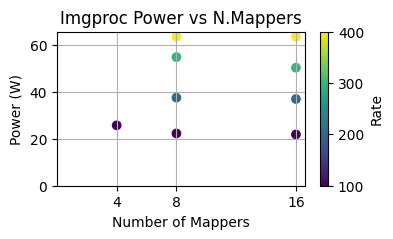

In [11]:
plt.figure(figsize=(4,2))
plt.scatter(d2['nmappers'], d2['pkg_watts_avg'], c=d2['rate'], cmap='viridis')
plt.colorbar(label='Rate')
plt.xticks(d2.nmappers.unique())
plt.xlabel('Number of Mappers')
plt.ylabel('Power (W)')
plt.title('Imgproc Power vs N.Mappers')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()
plt.savefig("Imgproc.pdf")


# Analysis

In [16]:
d2[(d2.rate==100)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
0,4,25.72
1,8,22.27
3,16,21.84


In [17]:
d2[(d2.rate==200)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
7,8,37.52
9,16,36.93


In [18]:
d2[(d2.rate==300)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
13,8,54.77
15,16,50.27


In [19]:
d2[(d2.rate==400)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
19,8,63.45
21,16,63.51
